<a href="https://colab.research.google.com/github/AtharvaKitkaru/CardioVascular-Disease-Predictor/blob/master/cardiovascular_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
df=pd.read_excel("cardio.xlsx")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,not_active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,0,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,0,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,1,1


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,not_active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.196271,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
not_active     0
cardio         0
dtype: int64

In [ ]:
df['age'] = df['age']/365

In [ ]:
df=df[(df['ap_hi'] < 250) & (df['ap_hi'] > 60)]
df=df[(df['ap_lo'] < 200) & (df['ap_lo'] > 10)]
df=df[df['ap_lo'] < df['ap_hi']]

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,not_active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,0,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,0,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,1,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,0,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,0,0
69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,0,1
69997,99996,52.235616,2,183,105.0,180,90,3,1,0,1,1,1
69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,1,1


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,not_active,cardio
count,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000,68692.000000
mean,49975.154661,53.327536,1.348629,164.361658,74.117983,126.673761,81.290034,1.364598,1.225659,0.087943,0.053354,0.196617,0.494745
std,28844.773328,6.761764,0.476540,8.183164,14.330828,16.694832,9.508008,0.678831,0.571497,0.283214,0.224740,0.397443,0.499976
min,0.000000,29.583562,1.000000,55.000000,11.000000,70.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25005.250000,48.378082,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,50012.500000,53.975342,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,74868.250000,58.421918,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


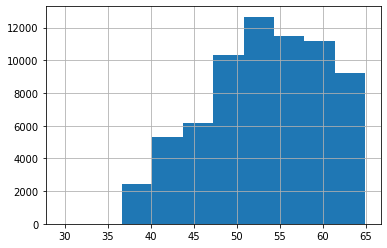

In [ ]:
import matplotlib.pyplot as plt
df["age"].hist()

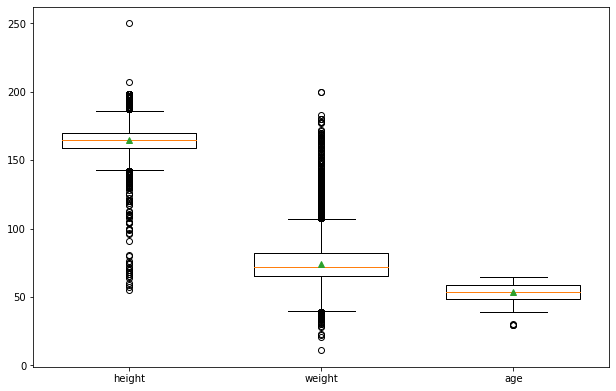

In [ ]:
fig = plt.figure(figsize =(8, 5))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot((df['height'],df["weight"],df["age"]),widths=.7, labels=['height', 'weight','age'],showmeans=True)
# show plot
plt.show()

In [ ]:
HQ1 = np.percentile(df['height'], 25)
HQ3 = np.percentile(df['height'], 75)
HIQR= HQ3-HQ1

wQ1 = np.percentile(df['weight'], 25)
wQ3 = np.percentile(df['weight'], 75)
wIQR= wQ3-wQ1

In [ ]:
df=df[(df['height'] < (HQ3+1.5*HIQR)) & (df['height'] > (HQ1-1.5*HIQR))]
df=df[(df['weight'] < (wQ3+1.5*wIQR)) & (df['weight'] > (wQ1-1.5*wIQR))]

NameError: ignored

In [ ]:
df['cardio'].value_counts()

0    33932
1    32570
Name: cardio, dtype: int64

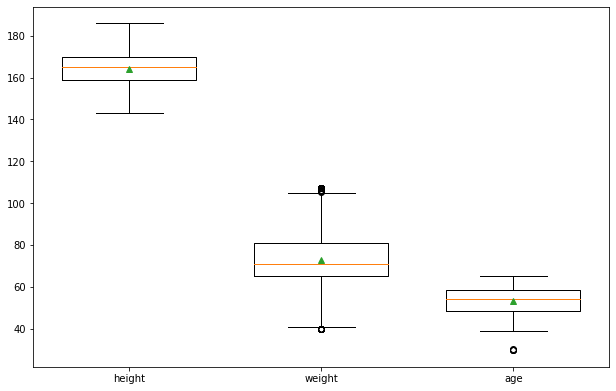

In [ ]:
fig = plt.figure(figsize =(8, 5))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot((df['height'],df["weight"],df["age"]),widths=.7, labels=['height', 'weight','age'],showmeans=True)
# show plot
plt.show()

In [ ]:
num_features=['age','height','weight','ap_hi','ap_lo']
binary_asym=['smoke','alco','active']
ordinal=['cholesterol','gluc']

In [ ]:
a_m,h_m,w_m,aph_m,apl_m=df[num_features].mean(axis=0)
a_s,h_s,w_s,aph_s,apl_s=df[num_features].std(axis=0)

In [ ]:
df['age']=(df['age']-a_m)/a_s
df['height']=(df['height']-h_m)/h_s
df['weight']=(df['weight']-w_m)/w_s
df['ap_hi']=(df['ap_hi']-aph_m)/aph_s
df['ap_lo']=(df['ap_lo']-apl_m)/apl_s


In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,not_active,cardio
0,0,-0.433787,2,0.488089,-0.888091,-0.992839,-0.122220,1,1,0,0,0,0
1,1,0.309487,1,-1.100613,0.969468,0.825131,0.938275,3,1,0,0,0,1
2,2,-0.245842,1,0.090914,-0.726564,0.219141,-1.182714,3,1,0,0,1,1
3,3,-0.745679,2,0.620481,0.727178,1.431121,1.998769,1,1,0,0,0,1
4,4,-0.806032,1,-1.100613,-1.372672,-1.598828,-2.243208,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,0.652162,1,0.090914,0.565651,1.431121,-0.122220,1,1,0,0,0,1
69995,99993,-0.090707,2,0.488089,0.242597,-0.386849,-0.122220,1,1,1,0,0,0
69997,99996,-0.161186,2,2.473966,2.584737,3.249091,0.938275,3,1,0,1,1,1
69998,99998,1.201820,1,-0.173870,-0.080457,0.522136,-0.122220,1,2,0,0,1,1


In [ ]:
#test-train split
#df = df.drop('id', 1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['cardio'], axis=1),df['cardio'],test_size=0.3,random_state=0)

In [ ]:
def distance (X):

  return dis

def KNN(k,X):

  return(pridiction)


def eucledian (x1,x2):
    return(np.sqrt(np.sum(x1-x2)**2))

df['cholesterol']=df['cholesterol']-1/(3-1)
df['gluc']=df['gluc']-1/(3-1)



In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,not_active,cardio
0,0,-0.433787,2,0.488089,-0.888091,-0.992839,-0.122220,0.5,0.5,0,0,0,0
1,1,0.309487,1,-1.100613,0.969468,0.825131,0.938275,2.5,0.5,0,0,0,1
2,2,-0.245842,1,0.090914,-0.726564,0.219141,-1.182714,2.5,0.5,0,0,1,1
3,3,-0.745679,2,0.620481,0.727178,1.431121,1.998769,0.5,0.5,0,0,0,1
4,4,-0.806032,1,-1.100613,-1.372672,-1.598828,-2.243208,0.5,0.5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,0.652162,1,0.090914,0.565651,1.431121,-0.122220,0.5,0.5,0,0,0,1
69995,99993,-0.090707,2,0.488089,0.242597,-0.386849,-0.122220,0.5,0.5,1,0,0,0
69997,99996,-0.161186,2,2.473966,2.584737,3.249091,0.938275,2.5,0.5,0,1,1,1
69998,99998,1.201820,1,-0.173870,-0.080457,0.522136,-0.122220,0.5,1.5,0,0,1,1
